# Eksplorasi data dan CLTV

# Outline
    [] Import data
    [] Customer profile
    [] CLTV

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pyodbc #untuk connect sql 
from datetime import datetime, date
from apyori import apriori
import warnings # warnings / peringatan

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
warnings.filterwarnings('ignore')

In [3]:
# Konfigurasi koneksi ke SQL Server
server = 'server'
database = 'database'
username = 'username'
password = 'password'

# Buat koneksi
connection = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [5]:
# Query menarik data dari SQL Server
query = """
WITH Tabel2 AS
	(
	SELECT IDTrx
	FROM Tabel2
	WHERE YEAR(PurchasedDate) = 2023
		AND Brand = 'A'
	),
Tabel3 AS
	(
	SELECT txtKontakID, RIGHT(txtRegionID,1) Region
	FROM Tabel31 WITH(NOLOCK)
	JOIN Tabel32 WITH(NOLOCK)
	ON Tabel31.txtCabangID = Tabel32.txtCabangID
	WHERE Tabel31.bolAktif = 1
	)

SELECT LEFT(KontakID, 4) + REPLICATE('X', (LEN(KontakID)-8)) + RIGHT(KontakID, 4) KontakID,
	Gender, BOD, City, Province, Region, UrbanRural, StatusMember, PurchasedDate,
	LEFT(IDTrx, 7) + REPLICATE('X', (LEN(IDTrx)-14)) + RIGHT(IDTrx, 7) IDTrx,
	LEFT(Channel, 2) + REPLICATE('X', (LEN(Channel)-4)) + RIGHT(Channel, 2) Channel,
	LEFT(ChannelGroup, 1) + REPLICATE('X', (LEN(ChannelGroup)-2)) + RIGHT(ChannelGroup, 1) ChannelGroup,
	LEFT(Brand, 2) + REPLICATE('X', (LEN(Brand)-3)) + RIGHT(Brand, 1) Brand,
	LEFT(Product, 2) + REPLICATE('X', (LEN(Product)-3)) + RIGHT(Product, 1) Product,
	LEFT(SKUProduct, 2) + REPLICATE('X', (LEN(SKUProduct)-9)) + RIGHT(SKUProduct, 10) SKUProduct,
	NetWeight, Qty, Amount
FROM
	(
	SELECT DISTINCT KontakID, Gender, BOD, 
		City, Province, Region, Urban_Rural UrbanRural, StatusMember, 
		PurchasedDate, Tabel2.IDTrx, Channel, ChannelGroup,
		Brand, SubBrand, Product, SKUProduct, NetWeight, Qty, Amount
	FROM Tabel1 WITH(NOLOCK)
	RIGHT JOIN Tabel2 ON Tabel1.IDTrx = Tabel2.IDTrx
	LEFT JOIN Tabel3 ON Tabel1.KontakID = Tabel3.txtKontakID
	LEFT JOIN Data_BPS Tabel4 ON Tabel1.City = Tabel4.txtNamaKabKota
	)Data
"""

data_raw= pd.read_sql(query, connection)

In [6]:
# Export data
data_raw.to_csv(r'/Data dan CLTV.csv')

# Import data
#data_raw = pd.read_csv(r'/MBA/Data CLTV.csv')
#data_raw = data_raw.drop(['Unnamed: 0'], axis=1)

data_raw.head()

KontakID Gender        BOD  City Province Region UrbanRural  \
0  0002XXXXXXXXXX0088   None 1900-01-01  None     None   None       None   
1  0002XXXXXXXXXX0558   None 1900-01-01  None     None   None       None   
2  0020XXXXXXXXXX0069   None 1900-01-01  None     None   None       None   
3  0020XXXXXXXXXX0015   None 1900-01-01  None     None   None       None   
4  0020XXXXXXXXXX0015   None 1900-01-01  None     None   None       None   

  StatusMember PurchasedDate                  IDTrx  \
0   NON MEMBER    2023-10-16   SO-KAL-XXXXXX0160002   
1   NON MEMBER    2023-10-22   SO-KAL-XXXXXX0220014   
2   NON MEMBER    2023-10-17  SO-KAL-XXXXXXX0170007   
3   NON MEMBER    2023-10-21   SO-KAL-XXXXXX0210004   
4   NON MEMBER    2023-10-21   SO-KAL-XXXXXX0210004   

                     Channel    ChannelGroup      Brand  \
0         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT  HIXXXXXX0   
1         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT   ENXXXXXL   
2  GRXXXXXXXXXXXXXXXXXXXXXSI  KXXXXXXXXXXXXT  HYXXXXXXO   
3         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT    KAXXXXE   
4         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT   MOXXXXXA   

                   Product                         SKUProduct  NetWeight  Qty  \
0          KAXXXXXXXXXXXX0       HIXXXXXXXXXXXXXXXXE 6X140 ML        840  1.0   
1            ENXXXXXXXXXXD   ENXXXXXXXXXXXXXXXXXXXXLATE 350GR        350  1.0   
2  HYXXXXXXXXXXXXXXXXXXXXK               HYXXXXXXXXOCO 330 ML        330  1.0   
3                  KAXXXXE         PAXXXXXXXXXXXXXXCARE KECIL          0  1.0   
4             CHXXXXXXXXXK  CHXXXXXXXXXXXXXXXXXXXXXRRY 140 ML        140  1.0   

     Amount  
0  29279.28  
1  63513.51  
2   7657.66  
3   1801.80  
4  27927.93

In [7]:
df = data_raw.copy() 

In [8]:
df.shape

(407851, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407851 entries, 0 to 407850
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   KontakID       407851 non-null  object        
 1   Gender         407626 non-null  object        
 2   BOD            407851 non-null  datetime64[ns]
 3   City           402405 non-null  object        
 4   Province       404538 non-null  object        
 5   Region         398095 non-null  object        
 6   UrbanRural     402405 non-null  object        
 7   StatusMember   407851 non-null  object        
 8   PurchasedDate  407851 non-null  object        
 9   IDTrx          407839 non-null  object        
 10  Channel        407851 non-null  object        
 11  ChannelGroup   407851 non-null  object        
 12  Brand          407849 non-null  object        
 13  Product        407849 non-null  object        
 14  SKUProduct     407849 non-null  object        
 15  

In [10]:
# Convert PurchasedDate to datetime and check missing values
df['PurchasedDate'] = pd.to_datetime(df['PurchasedDate'])
df.isnull().sum()

KontakID            0
Gender            225
BOD                 0
City             5446
Province         3313
Region           9756
UrbanRural       5446
StatusMember        0
PurchasedDate       0
IDTrx              12
Channel             0
ChannelGroup        0
Brand               2
Product             2
SKUProduct          2
NetWeight           0
Qty                 0
Amount              0
dtype: int64

In [11]:
df = df.dropna(subset=['SKUProduct'])

In [12]:
df.isnull().sum()

KontakID            0
Gender            225
BOD                 0
City             5446
Province         3313
Region           9756
UrbanRural       5446
StatusMember        0
PurchasedDate       0
IDTrx              12
Channel             0
ChannelGroup        0
Brand               2
Product             2
SKUProduct          0
NetWeight           0
Qty                 0
Amount              0
dtype: int64

In [13]:
# Membuat var usia dan Klp_Usia
today_date = datetime.now().strftime("%d-%m-%Y")
today_date = pd.to_datetime(today_date)
Usia = today_date.year - df['BOD'].dt.year.to_frame()
Usia.rename(columns={'BOD': 'Usia'}, inplace=True)
df = pd.merge(df, Usia, left_index =True, right_index = True)
df['Klp_Usia'] =  np.where(df['Usia'] <= 20, '<=20',
                           np.where((df['Usia'] > 20) & (df['Usia'] <= 30), '21-30',
                                    np.where((df['Usia'] > 30) & (df['Usia'] <= 40), '31-40',
                                             np.where((df['Usia'] > 40) & (df['Usia'] <= 50), '41-50',
                                                      np.where((df['Usia'] > 50) & (df['Usia'] <= 60), '51-60', 
                                                               np.where((df['Usia'] > 60) & (df['Usia']<=70),'61-70',
                                                                        np.where((df['Usia'] > 70) & (df['Usia']<=80),'71-80', None)))))))


# Membuat variabel PurchasedDate_Month, PurchasedDate_Date, PurchasedDate_Day
df['Purchased_Month'] = df['PurchasedDate'].dt.strftime("%B")
df['Purchased_Date'] = df['PurchasedDate'].dt.strftime("%d")
df['Purchased_Day'] = df['PurchasedDate'].dt.weekday
df['Purchased_Day'] =df['Purchased_Day'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6:'Sunday'})
df.head()

KontakID Gender        BOD  City Province Region UrbanRural  \
0  0002XXXXXXXXXX0088   None 1900-01-01  None     None   None       None   
1  0002XXXXXXXXXX0558   None 1900-01-01  None     None   None       None   
2  0020XXXXXXXXXX0069   None 1900-01-01  None     None   None       None   
3  0020XXXXXXXXXX0015   None 1900-01-01  None     None   None       None   
4  0020XXXXXXXXXX0015   None 1900-01-01  None     None   None       None   

  StatusMember PurchasedDate                  IDTrx  \
0   NON MEMBER    2023-10-16   SO-KAL-XXXXXX0160002   
1   NON MEMBER    2023-10-22   SO-KAL-XXXXXX0220014   
2   NON MEMBER    2023-10-17  SO-KAL-XXXXXXX0170007   
3   NON MEMBER    2023-10-21   SO-KAL-XXXXXX0210004   
4   NON MEMBER    2023-10-21   SO-KAL-XXXXXX0210004   

                     Channel    ChannelGroup      Brand  \
0         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT  HIXXXXXX0   
1         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT   ENXXXXXL   
2  GRXXXXXXXXXXXXXXXXXXXXXSI  KXXXXXXXXXXXXT  HYXXXXXXO   
3         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT    KAXXXXE   
4         MAXXXXXXXXXXXXXXNG  KXXXXXXXXXXXXT   MOXXXXXA   

                   Product                         SKUProduct  NetWeight  Qty  \
0          KAXXXXXXXXXXXX0       HIXXXXXXXXXXXXXXXXE 6X140 ML        840  1.0   
1            ENXXXXXXXXXXD   ENXXXXXXXXXXXXXXXXXXXXLATE 350GR        350  1.0   
2  HYXXXXXXXXXXXXXXXXXXXXK               HYXXXXXXXXOCO 330 ML        330  1.0   
3                  KAXXXXE         PAXXXXXXXXXXXXXXCARE KECIL          0  1.0   
4             CHXXXXXXXXXK  CHXXXXXXXXXXXXXXXXXXXXXRRY 140 ML        140  1.0   

     Amount  Usia Klp_Usia Purchased_Month Purchased_Date Purchased_Day  
0  29279.28   124     None         October             16        Monday  
1  63513.51   124     None         October             22        Sunday  
2   7657.66   124     None         October             17       Tuesday  
3   1801.80   124     None         October             21      Saturday  
4  27927.93   124     None         October             21      Saturday

# Customer Profile

In [14]:
# Filter brand A
df_brand = df[df['Brand'] == 'A']

cols = ['KontakID', 'Gender', 'Klp_Usia', 'City', 'Province', 'Region', 'UrbanRural', 'StatusMember', 'ChannelGroup']
df_profile = df_brand[cols].drop_duplicates(subset = 'KontakID')

col = ['Gender', 'Klp_Usia', 'City', 'Province', 'Region', 'UrbanRural', 'StatusMember', 'ChannelGroup']

for c in col:
  print("Variable:",c)
  print((df_profile[c].value_counts()/len(df_profile)).head(10))
  print('---------------------------------------------------')

Variable: Gender
Gender
PEREMPUAN    0.914063
LAKI-LAKI    0.085470
Name: count, dtype: float64
---------------------------------------------------
Variable: Klp_Usia
Klp_Usia
31-40    0.201440
41-50    0.086189
21-30    0.073502
51-60    0.024224
61-70    0.009079
<=20     0.003719
71-80    0.002772
Name: count, dtype: float64
---------------------------------------------------
Variable: City
City
BEKASI             0.057158
JAKARTA TIMUR      0.054933
TANGERANG          0.052007
BANDUNG            0.048159
SURABAYA           0.039062
BOGOR              0.031914
DEPOK              0.030906
SEMARANG           0.029639
PALEMBANG          0.026062
JAKARTA SELATAN    0.023407
Name: count, dtype: float64
---------------------------------------------------
Variable: Province
Province
JAWA BARAT          0.235597
JAWA TIMUR          0.131041
DKI JAKARTA         0.128165
JAWA TENGAH         0.121194
BANTEN              0.079932
SUMATERA SELATAN    0.032412
SUMATERA UTARA      0.030930
BALI   

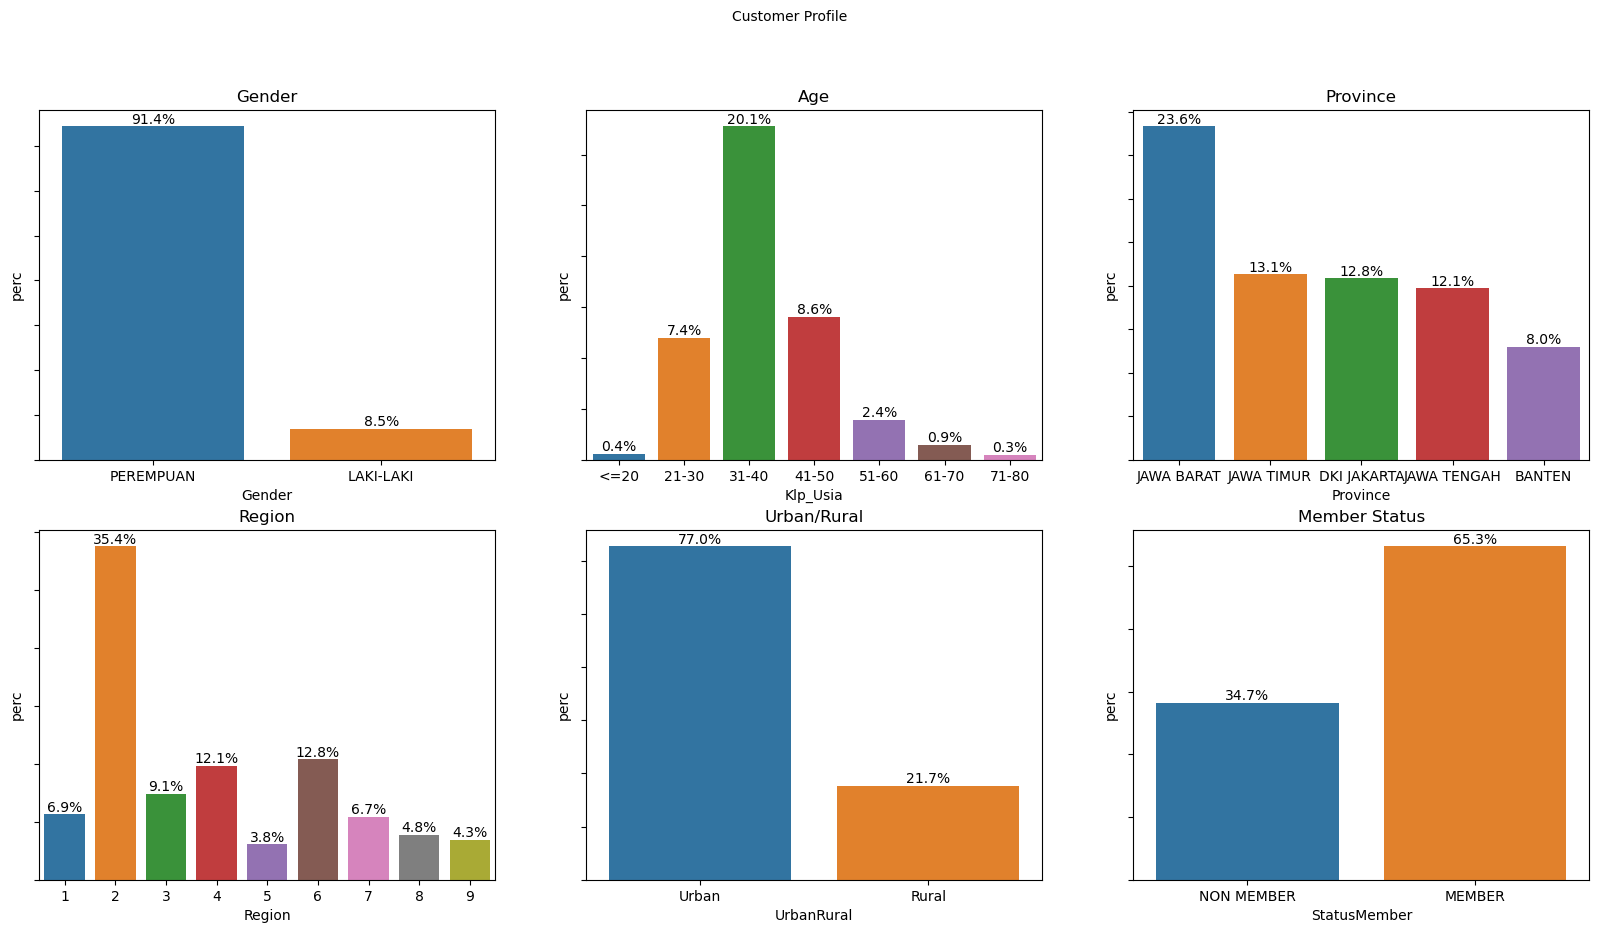

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan urutan yang diinginkan untuk setiap grafik
urutan_Klp_Usia = ['<=20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
urutan_Region = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Membuat subplot dengan 3 grafik
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Membuat grafik countplot
sns.countplot(x=df_profile['Gender'], ax=axs[0, 0])
axs[0, 0].set_title('Gender')
axs[0, 0].set_ylabel('perc')
axs[0, 0].set_yticklabels([])

sns.countplot(x=df_profile['Klp_Usia'], order=urutan_Klp_Usia, ax=axs[0, 1])
axs[0, 1].set_title('Age')
axs[0, 1].set_ylabel('perc')
axs[0, 1].set_yticklabels([]) # menghapus label y

sns.countplot(x=df_profile['Province'], order=df_profile['Province'].value_counts().head(5).index, ax=axs[0, 2])
axs[0, 2].set_title('Province')
axs[0, 2].set_ylabel('perc')
axs[0, 2].set_yticklabels([])

sns.countplot(x=df_profile['Region'], order=urutan_Region, ax=axs[1, 0])
axs[1, 0].set_title('Region')
axs[1, 0].set_ylabel('perc')
axs[1, 0].set_yticklabels([])

sns.countplot(x=df_profile['UrbanRural'], ax=axs[1, 1])
axs[1, 1].set_title('Urban/Rural')
axs[1, 1].set_ylabel('perc')
axs[1, 1].set_yticklabels([]) 

sns.countplot(x=df_profile['StatusMember'], ax=axs[1, 2])
axs[1, 2].set_title('Member Status')
axs[1, 2].set_ylabel('perc')
axs[1, 2].set_yticklabels([])

# Menambahkan label dan judul keseluruhan
for ax in axs.flat:
    total = len(df_profile)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha ='center', va ='bottom')

fig.suptitle('Customer Profile', size = 10)
plt.show()

In [16]:
# Top SKU Product by amount and qty
result = df_brand.groupby('SKUProduct').agg({'Amount': 'sum', 'Qty': 'sum'}).sort_values(by='Amount', ascending=False)
result

Amount       Qty
SKUProduct                                          
HYXXXXXXXXXXXXXXXXINAL 500ML  2.807484e+09  184780.0
HYXXXXXXXXXXXXXXXXINAL 250ML  1.925255e+09  235228.0
HYXXXXXXXXXXXXXXXA-D 330 ML   5.375282e+08   47633.0
HYXXXXXXXXXCO 1 LITER         5.343206e+08   21318.0
HYXXXXXXXXOCO 330 ML          2.224266e+07    3132.0
HYXXXXXXXXXXO SHRINK 6        1.090952e+07     315.0

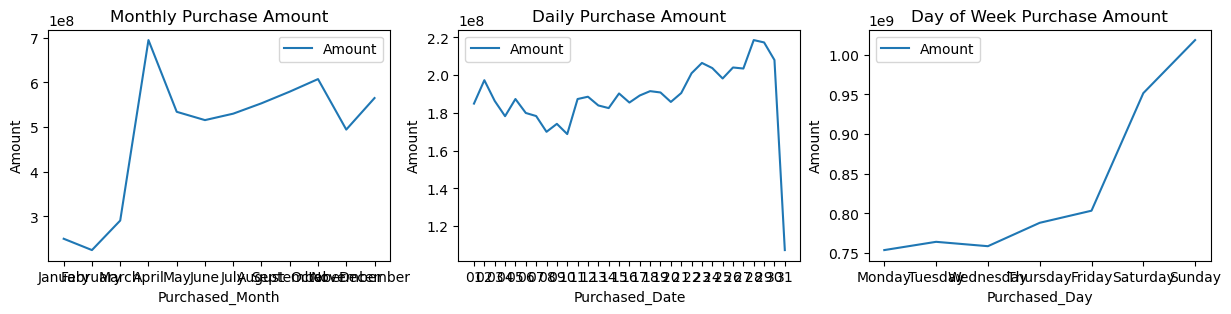

In [22]:
# Set urutan output
urutan_Bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
urutan_Tanggal = sorted(df_brand['Purchased_Date'].unique())
urutan_Hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Membuat subplot dengan 3 grafik
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))  # Adjusted figsize for better visualization

# Group by data
df_Bulan_Amount = df_brand.groupby('Purchased_Month').agg({'Amount': 'sum'}).reindex(urutan_Bulan)
df_Tanggal_Amount = df_brand.groupby('Purchased_Date').agg({'Amount': 'sum'}).reindex(urutan_Tanggal)
df_Hari_Amount = df_brand.groupby('Purchased_Day').agg({'Amount': 'sum'}).reindex(urutan_Hari)

# line plot
sns.lineplot(x=df_Bulan_Amount.index, y=df_Bulan_Amount['Amount'], label='Amount', ax=axs[0])
sns.lineplot(x=df_Tanggal_Amount.index, y=df_Tanggal_Amount['Amount'], label='Amount', ax=axs[1])
sns.lineplot(x=df_Hari_Amount.index, y=df_Hari_Amount['Amount'], label='Amount', ax=axs[2])

# Set titles for each subplot
axs[0].set_title('Monthly Purchase Amount')
axs[1].set_title('Daily Purchase Amount')
axs[2].set_title('Day of Week Purchase Amount')

# Show the plot
plt.show()

# CLTV

In [23]:
df_cltv = df_brand.copy()
df_cltv = df_cltv[['KontakID', 'IDTrx', 'PurchasedDate', 'ChannelGroup' , 'Amount']]
df_cltv.rename(columns={'KontakID': 'kontak_id', 'IDTrx': 'id_trx', 'PurchasedDate' : 'purchased_date', 'ChannelGroup' : 'channel_group', 'Amount' : 'gmv'}, inplace=True)

# Extract month and year
df_cltv['purchased_month'] = df_cltv['purchased_date'].dt.month
df_cltv['purchased_year'] = df_cltv['purchased_date'].dt.year
df_cltv['purchased_year_month'] = df_cltv.purchased_date.dt.strftime('%Y-%m')
df_cltv.head()

kontak_id                           id_trx purchased_date  \
2  0020XXXXXXXXXX0069            SO-KAL-XXXXXXX0170007     2023-10-17   
5  0023XXXXXXXXXX0024             SO-KAL-XXXXXX0140012     2023-10-14   
6        0409XXXX2261  J519-78XXXXXXXXXXXXXXXXX2001537     2023-04-27   
7        0409XXXX3391  KD02-33XXXXXXXXXXXXXXXXX0102457     2023-04-17   
8        0409XXXX4501  J827-40XXXXXXXXXXXXXXXXX8701476     2023-04-26   

    channel_group       gmv  purchased_month  purchased_year  \
2  KXXXXXXXXXXXXT   7657.66               10            2023   
5  KXXXXXXXXXXXXT   6306.31               10            2023   
6         CXXXXXM  14700.00                4            2023   
7         CXXXXXM  10600.00                4            2023   
8         CXXXXXM  14500.00                4            2023   

  purchased_year_month  
2              2023-10  
5              2023-10  
6              2023-04  
7              2023-04  
8              2023-04

In [24]:
def calculate_cltv(data_brand, echo=True):
    """
    Calculate CLTV using new formula

    Args: raw_data (pandas dataframe)
    Returns: cltv_result (pandas dataframe)
    """

    # initiate variables to store the results
    months =[]
    total_gmvs = []
    total_customers = []
    apvs = []
    apfrs = []
    cvs = []
    avg_lifespans = []
    cltvs = []
    
    # Calculate CLTV cumulatively given month and year
    for m in sorted(data_brand.purchased_year_month.unique()):
    
        temp = data_brand[data_brand.purchased_year_month <= m]
        temp.purchased_year_month.unique()
        
        ###### Calculate lifespan per kontakID
        lifespan_data = temp.groupby('kontak_id').agg({'purchased_date': ['min','max'],
                                                      'purchased_year_month':['nunique'],
                                                      'gmv': 'sum',
                                                      'id_trx': 'nunique'
                                                     }).reset_index()

        # Calculate lifespan days from last purchasing date minus first purchasing date. 
        # Added + 1 so  that one time purchaser will not have 0 lifespan
        lifespan_data['lifespan_days'] = (lifespan_data.purchased_date['max'] - lifespan_data.purchased_date['min']).dt.days + 1 

        # Convert the lifespan to month
        lifespan_data['lifespan_months'] = np.ceil(lifespan_data['lifespan_days'] / 30) # By ceiling, one time customer will have 1 month

        # Finally, calculate frequency per person per month. this will give value how many purchase each contact make per month
        lifespan_data['freq_per_month'] = lifespan_data.id_trx['nunique'] / lifespan_data['lifespan_months']

        # Calculate total GMV, Order and Cstomer 
        total_gmv = lifespan_data.gmv['sum'].sum()
        total_order = lifespan_data.id_trx['nunique'].sum()
        total_customer = lifespan_data.shape[0]

        #### Calculate APV, APFR, CV, and Lifespan
        # Average Purchase Value
        apv = total_gmv / total_order
        
        # Average Purchase Freq Rate
        apfr = lifespan_data['freq_per_month'].mean()
        
        # Customer Value
        cv  = apv * apfr
        
        # Average Lifespan
        avg_lifespan = lifespan_data['lifespan_months'].mean()

        ##### Finally, calculate CLTV!
        # CLTV
        cltv = cv * avg_lifespan

        # Store those results
        months.append(m)
        total_gmvs.append(total_gmv)
        total_customers.append(total_customer)
        apvs.append(apv)
        apfrs.append(apfr)
        cvs.append(cv)
        avg_lifespans.append(avg_lifespan)
        cltvs.append(cltv)

        # For debugging purpose
        if echo:
            print('\n',m)
            print("Total GMV: {}".format(total_gmv))
            print("Total Orders: {}".format(total_order))
            print("Total Customers: {}".format(total_customer))
            print("Average Purchase Value (APV): {} Rupiah / order".format(apv))
            print("Average Purchase Freq Rate (APFR): {} order / month person".format(apfr))
            print("Customer Value (CV): {} rupiah / person month".format(cv))
            print("Average Lifespan: {} month".format(avg_lifespan))
            print("CLTV is {} rupiah / person".format(cltv))
            print("--------------------------------------------------------------------------------------------------")

    # Export Result
    cltv_result = pd.DataFrame({
        "month": months,
        "total_gmv": total_gmvs,
        "total_customer": total_customers,
        "apv":apvs,
        "apfr": apfrs,
        "cv": cvs,
        "avg_lifespan": avg_lifespans,
        "cltv": cltvs
      
    })

    return cltv_result

In [25]:
cltv = calculate_cltv(df_cltv, True)


 2023-01
Total GMV: 249909938.1
Total Orders: 16273
Total Customers: 12470
Average Purchase Value (APV): 15357.336575923307 Rupiah / order
Average Purchase Freq Rate (APFR): 1.3039294306335205 order / month person
Customer Value (CV): 20024.88313749102 rupiah / person month
Average Lifespan: 1.0006415396952686 month
CLTV is 20037.729894916833 rupiah / person
--------------------------------------------------------------------------------------------------

 2023-02
Total GMV: 474465969.58
Total Orders: 31328
Total Customers: 21280
Average Purchase Value (APV): 15145.10883490807 Rupiah / order
Average Purchase Freq Rate (APFR): 1.3169172932330826 order / month person
Customer Value (CV): 19944.85573258758 rupiah / person month
Average Lifespan: 1.0833176691729323 month
CLTV is 21606.614624217174 rupiah / person
--------------------------------------------------------------------------------------------------

 2023-03
Total GMV: 765118115.72
Total Orders: 49857
Total Customers: 31760
A